<center> <h1> [SI4C-L1] 4MEO/MIN INSTRUMENTATION </h1> <br> <h2> Computer session 2: Calibration curves and linear regression </h2> </center>

#### First name: Nicolas

<span>

#### Last name : Samelson

<span>

#### Noma : 17288

## Part I : Linear regression for instrument calibration

#### Example : Linear potentiometer calibration


In [1]:
import numpy as np
from scipy.stats import t
import matplotlib.pyplot as plt


def linreg(X, Y):
    """
    Summary
        Linear regression of y = ax + b
    Usage
        real, real, real = linreg(list, list)
    Returns coefficients to the regression line "y=ax+b" from x[] and y[], and R^2 Value
    """
    N = len(X)

    if N != len(Y):  raise(ValueError, 'unequal length')

    Sx = Sy = Sxx = Syy = Sxy = 0.0
    for x, y in zip(X, Y):
        Sx  += x
        Sy  += y
        Sxx += x*x
        Syy += y*y
        Sxy += x*y

    det =  Sx * Sx - Sxx * N # see the lecture

    a,b = (Sy * Sx - Sxy * N)/det, (Sx * Sxy - Sxx * Sy)/det

    meanerror = residual = residualx = 0.0

    for x, y in zip(X, Y):
        meanerror += (y - Sy/N)**2
        residual  += (y - a * x - b)**2
        residualx += (x - Sx/N)**2

    RR = 1 - residual/meanerror
    # linear regression, a_0, a_1 => m = 1
    m = 1
    nu = N - (m+1)

    sxy = np.sqrt(residual / nu)

    # Var_a, Var_b = ss * N / det, ss * Sxx / det

    Sa = sxy * np.sqrt(1/residualx)
    Sb = sxy * np.sqrt(Sxx/(N*residualx))


    # We work with t-distribution, ()
    # t_{nu;\alpha/2} = t_{3,95} = 3.18
    tvalue = t.ppf(1-(1-0.95)/2, nu)

    print("Estimate: y = ax + b")
    print("N = %d" % N)
    print("Degrees of freedom $\\nu$ = %d " % nu)
    print("a = %.2f $\\pm$ %.3f" % (a, tvalue*Sa/np.sqrt(N)))
    print("b = %.2f $\\pm$ %.3f" % (b, tvalue*Sb/np.sqrt(N)))
    print("R^2 = %.3f" % RR)
    print("Syx = %.3f" % sxy)
    print("y = %.2f x + %.2f $\\pm$ %.3f V" % (a, b, tvalue*sxy/np.sqrt(N)))
    return a, b, RR, sxy

In [2]:
X = np.array([1.0, 2.0, 3.0, 4.0, 5.0]) # (cm)
Y = np.array([1.2, 1.9, 3.2, 4.1, 5.3]) # (Volt)

In [3]:
a,b,RR,sxy = linreg(X,Y)

Estimate: y = ax + b
N = 5
Degrees of freedom $\nu$ = 3 
a = 1.04 $\pm$ 0.072
b = 0.02 $\pm$ 0.238
R^2 = 0.993
Syx = 0.159
y = 1.04 x + 0.02 $\pm$ 0.227 V


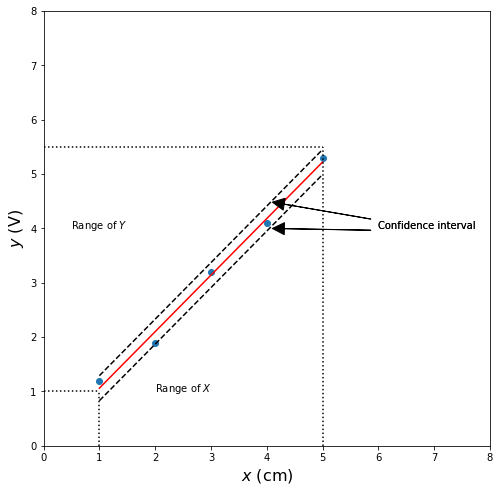

In [4]:
ig,ax = plt.subplots(figsize=(8,8))
ax.plot(X,Y,'o')
ax.plot(X,(X*a + b),'r-')
ax.plot(X,(X*a + b +.23),'k--')
ax.plot(X,(X*a + b - .23),'k--')
ax.set_xlim((0,8))
ax.set_ylim((0,8))
ax.text(.5,4,'Range of $Y$')
ax.text(2,1,'Range of $X$')
ax.plot([0,1],[1,1],'k:')
ax.plot([0,5],[5.5,5.5],'k:')
ax.plot([1,1],[0,1],'k:')
ax.plot([5,5],[0,5.5],'k:')

ax.annotate('Confidence interval', xy=(4,4), xytext=(6,4),
            arrowprops=dict(facecolor='black', shrink=0.05,width=.1),
            )
ax.annotate('Confidence interval', xy=(4,4.5), xytext=(6,4),
            arrowprops=dict(facecolor='black', shrink=0.05,width=.1),
            )

ax.set_xlabel('$x$ (cm)',fontsize=16)
ax.set_ylabel('$y$ (V)',fontsize=16);

Estimated coefficients:
a = 1.0400000000000005            
b = 0.01999999999999824


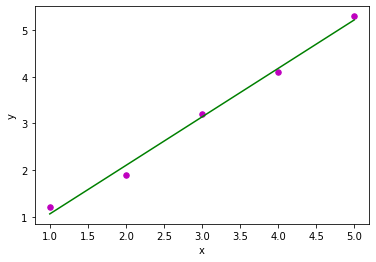

In [5]:

"""___________BETTER Linear regression________________"""


def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)
 
    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)
 
    # calculating cross-deviation and squarre deviation of x
    SS_xy = np.sum(y*x) - n * m_y * m_x
    SS_xx = np.sum(x*x) - n * m_x * m_x
 
    # calculating regression coefficients
    b_1 = SS_xy / SS_xx   # a = slope
    b_0 = m_y - b_1 * m_x # b = y - a x
 
    return (b_0, b_1)
 
def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",
               marker = "o", s = 30)
 
    # predicted response vector
    # y = a * x + b
    y_pred = b[0] + b[1]*x
 
    # plotting the regression line
    plt.plot(x, y_pred, color = "g")
 
    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')
 
    # function to show plot
    plt.show()
    
# better regression : 
b = estimate_coef(X, Y)
print("Estimated coefficients:\na = {}  \
          \nb = {}".format(b[1], b[0]))
plot_regression_line(X, Y, b)

### EXO A : Static calibration curves for uncertainty estimation
#### Concentration analysis of a solute using spectroscopy.


In [6]:
import numpy as np
import pylab as pl

https://github.com/alexlib/engineering_experiments_measurements_course/blob/master/notebooks/unsorted/homework1_example-copy.ipynb

 In this part, we are interested in the analysis of the concentration of a solute using spectroscopy. The following data was obtained after a concentration analysis.

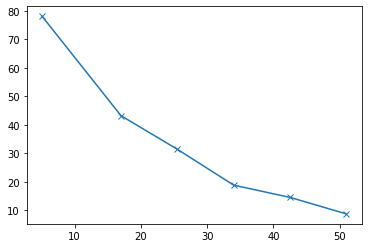

In [7]:
c = np.array([5.1, 17.0, 25.5, 34.0, 42.5, 51.0 ]) # concentration [ppm]
T = np.array([78.1, 43.2, 31.4, 18.8, 14.5, 8.7]) # transmittance, [%]

plt.plot(c,T,"-x")

 Following calibration, a sample of concentration was analyzed and the measured transmittance was 35.6%.

####  The objective of this exercice is to report the concentration of analyte in the form of a confidence interval.

1. First, convert the transmittance into absorbance,
2. Plot the calibration curve.
3. Why do we need to convert the transmittence into absorbance ? 

In [8]:
# 1 transform transmittance into absorbance

"""The transmittance, T, of the solution is defined as the ratio of the transmitted intensity, I, over
the incident intensity, I0 and takes values between 0 and 1. However, it is more commonly
expressed as a percentage transmittance"""

"""The absorbance, A, of the solution is related to the transmittance and incident and transmitted
intensities through the following relations"""

A = - np.log10(T/100)
print(A)
print(T/100)

[0.10734897 0.36451625 0.50307035 0.72584215 0.838632   1.06048075]
[0.781 0.432 0.314 0.188 0.145 0.087]


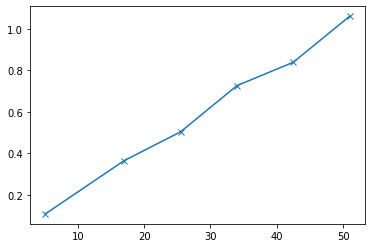

In [9]:
# 2 plot the calib curve

plt.plot(c,A,"-x")

In [10]:
# 3 why :
"""
As the transmittance is decreasing in a logarithmic scale 
(because light intensity depends one the distance squared : 1/d²),
we turn the values into a linear function to be able to read more clearly the original transmittance 
"""

'\nAs the transmittance is decreasing in a logarithmic scale \n(because light intensity depends one the distance squared : 1/d²),\nwe turn the values into a linear function to be able to read more clearly the original transmittance \n'

4. Using the function linreg perform the linear regression and plot the linearcurve in the same graph with the calibration curve

y =  0.020388147892420553 x + 0.004987628525743526


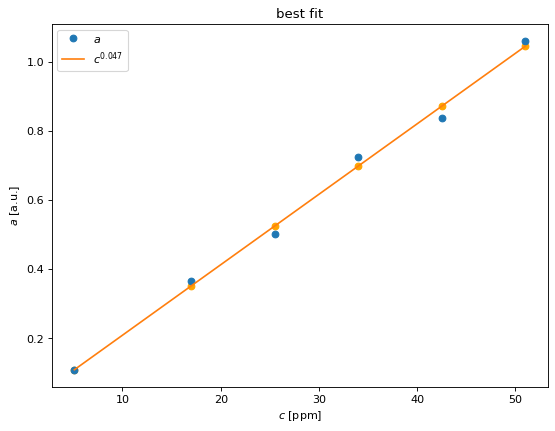

In [11]:
import numpy as np
from scipy.stats import t
import matplotlib.pyplot as plt

# 4 calibration
b,a = estimate_coef(c,A)


print("y = ",a,"x +",b)
y = a * c +b

plt.figure(figsize=(8, 6), dpi=80)
plt.plot(c,A,'o', c,y)
plt.scatter(c,y,color = "orange")
pl.xlabel('$c$ [ppm]')
pl.ylabel('$a$ [a.u.]')
pl.title('best fit')
pl.legend(('$a$','$c^{0.047}$'),loc='best')

5. Based on your previous findings, compute the deviation for each point of the dataset and plot the results.

Deviation for each point :  [-0.00161822  0.01293011 -0.02181505  0.02765749 -0.03285192  0.01569758]
Squares :  0.0027363019626781577


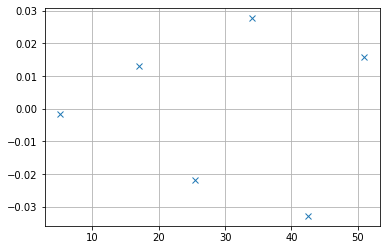

In [12]:
def compute_deviations(x,y,y_c):
    
    # for each point
    print("Deviation for each point : ",y-y_c)
    plt.plot(x,y-y_c,"x")
    pl.grid(True)

    
    # least squares
    squares = np.sum((y-y_c)**2)
    print("Squares : ",squares)
    
compute_deviations(c,A,y)

6. Now, using the calibration curve, estimate the value of concentration from the measurement.

In [13]:
T1 = 35.6              # percent transmittance
a1 = -np.log10(T1/100) # absorbance
c1 = (a1 - b)/a        # y = a * x + b <=> y - b = a * x <=> x = (y-b) / a


print("absorbance : ",a1)
print("concentration :",c1,"%")

absorbance :  0.4485500020271248
concentration : 21.75589346525581 %


7. Assume random white noise estimate the confidence level. Estimate the concentration of the sample and compute its corresponding uncertainty.



In [14]:
dev = A-y
print(dev)
stdev = np.mean(dev**2)**0.5 # standard deviation teta = sqrt(1/n SUM (xi-xy)²)

print("We can estimate the concentration of the sample as: %6.4f with uncertainty %6.4f" % (c1, stdev))

[-0.00161822  0.01293011 -0.02181505  0.02765749 -0.03285192  0.01569758]
We can estimate the concentration of the sample as: 21.7559 with uncertainty 0.0214


### EXO B : Linear regression error


In this exercice we will work on the data provided during the computer session I , EXO B

1. Using the function linreg perform the linear regression and plot the linearity curve in the same graph with the calibration curve
2. Based on your previous result compute and plot the deviation curve for each point of the dataset.
3. We perform a voltage measurement using the same instrument and we find Y = 3.2 V , estimate the value of the voltage based on your previous findings. What is the confidence level ? 

In [15]:
from scipy.stats import t


def linreg(X, Y):
    """
    Summary
        Linear regression of y = ax + b
    Usage
        real, real, real = linreg(list, list)
    Returns coefficients to the regression line "y=ax+b" from x[] and y[], and R^2 Value
    """
    N = len(X)

    if N != len(Y):  raise(ValueError, 'unequal length')

    Sx = Sy = Sxx = Syy = Sxy = 0.0
    for x, y in zip(X, Y):
        Sx = Sx + x
        Sy = Sy + y
        Sxx = Sxx + x*x
        Syy = Syy + y*y
        Sxy = Sxy + x*y

    det =  Sx * Sx - Sxx * N # see the lecture

    a,b = (Sy * Sx - Sxy * N)/det, (Sx * Sxy - Sxx * Sy)/det

    meanerror = residual = residualx = 0.0

    for x, y in zip(X, Y):
        meanerror = meanerror + (y - Sy/N)**2
        residual = residual + (y - a * x - b)**2
        residualx = residualx + (x - Sx/N)**2

    RR = 1 - residual/meanerror
    # linear regression, a_0, a_1 => m = 1
    m = 1
    nu = N - (m+1)

    sxy = np.sqrt(residual / nu)

    # Var_a, Var_b = ss * N / det, ss * Sxx / det

    Sa = sxy * np.sqrt(1/residualx)
    Sb = sxy * np.sqrt(Sxx/(N*residualx))


    # We work with t-distribution, ()
    # t_{nu;\alpha/2} = t_{3,95} = 3.18
    tvalue = t.ppf(1-(1-0.95)/2, nu)

    print("Estimate: y = ax + b")
    print("N = %d" % N)
    print("Degrees of freedom $\\nu$ = %d " % nu)
    print("a = %.2f $\\pm$ %.3f" % (a, tvalue*Sa/np.sqrt(N)))
    print("b = %.2f $\\pm$ %.3f" % (b, tvalue*Sb/np.sqrt(N)))
    print("R^2 = %.3f" % RR)
    print("Syx = %.3f" % sxy)
    print("y = %.2f x + %.2f $\\pm$ %.3f V" % (a, b, tvalue*sxy/np.sqrt(N)))
    return a, b, RR, sxy


In [16]:
# Yes

### EXO C : Hot wire calibration


We expect the calibration from the King's law in the form: 

$$ E = a + b U^m $$



In [17]:
import numpy as np
import matplotlib.pyplot as plt

# given data: 
U = np.array([0.0, 10.0, 20.0, 30.0, 40.0]) # air velocity, (m/s)
E = np.array([3.19, 3.99, 4.30, 4.48, 4.65]) # voltage (V)

In [18]:
import numpy as np
from scipy.stats import t


def linreg(X, Y):
    """
    Summary
        Linear regression of y = ax + b
    Usage
        real, real, real = linreg(list, list)
    Returns coefficients to the regression line "y=ax+b" from x[] and y[], and R^2 Value
    """
    N = len(X)

    if N != len(Y):  raise(ValueError, 'unequal length')

    Sx = Sy = Sxx = Syy = Sxy = 0.0
    for x, y in zip(X, Y):
        Sx = Sx + x
        Sy = Sy + y
        Sxx = Sxx + x*x
        Syy = Syy + y*y
        Sxy = Sxy + x*y

    det =  Sx * Sx - Sxx * N # see the lecture

    a,b = (Sy * Sx - Sxy * N)/det, (Sx * Sxy - Sxx * Sy)/det

    meanerror = residual = residualx = 0.0

    for x, y in zip(X, Y):
        meanerror = meanerror + (y - Sy/N)**2
        residual = residual + (y - a * x - b)**2
        residualx = residualx + (x - Sx/N)**2

    RR = 1 - residual/meanerror
    
    """
    King’s law coeff. A = 1.51,
    B = 0.811, m = 0.43
    """
    m = 0.43
    nu = N - (m+1)

    sxy = np.sqrt(residual / nu)

    # Var_a, Var_b = ss * N / det, ss * Sxx / det

    Sa = sxy * np.sqrt(1/residualx)
    Sb = sxy * np.sqrt(Sxx/(N*residualx))


    # We work with t-distribution, ()
    # t_{nu;\alpha/2} = t_{3,95} = 3.18
    tvalue = t.ppf(1-(1-0.95)/2, nu)

    print("R^2 = %.3f" % RR)
    print("Syx = %.3f" % sxy)
    return a, b, RR, sxy, tvalue

1. Plot the calibration curve.
2. Use a logarithmic scale and plot the calibration curve again.
3. what can you say about it ?


R^2 = 0.878
Syx = 0.213
y =  0.0341 x^.43 + 3.44


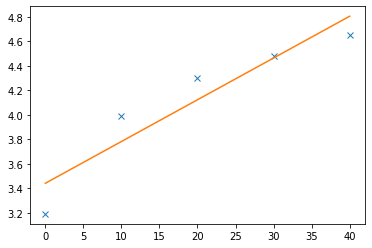

In [19]:
# 1 calbiration
"""
King’s law coeff. A = 1.51,
B = 0.811, m = 0.43
"""
a, b, RR, sxy, tvalue = linreg(U,E)

y = a * U**0.43 + b
plt.plot(U,E,"x",U,a*U+b)

print("y = ",a,"x^.43 +",b)

R^2 = 0.999
Syx = 0.001
y =  0.10991839969222567 x + 0.4870219618072536


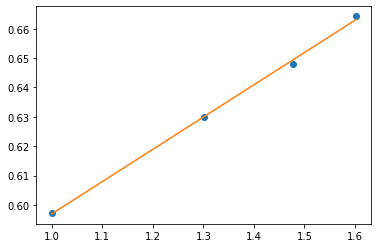

In [20]:
# 2 log scale
# E = a + b * U^m <=> y = a + bx^m
# log(E - a) = log(b) + m log(U)
# plt.plot(U,3.19+0.3*U**0.43)

Y = np.log10(E[1:]-a)
X = np.log10(U[1:])

A, B, RR, sxy, tvalue = linreg(X,Y)

Y_ = A * X + B
print("y = ",A,"x +",B)
plt.plot(X, Y, "o", X, Y_)


In [21]:
# 3 
"""
The curve was indeed logarithmic, we can see that the calbiration curve fits way better the input points
"""

'\nThe curve was indeed logarithmic, we can see that the calbiration curve fits way better the input points\n'


Instead of working with non-linear curve we will use the trick you have already seen : the logarithmic scale

4. To use linear regression, first convert the equation to linear form: 
    $$ \log_{10}(E-a) = \log_{10} b + m\, \log_{10} U $$ 

5. what is the value of a ?

6. By using the function linreg, solve the equation as a linear regression $$ Y = B + m X $$
    
7. Plot the calibration curve and the confidence level curves.

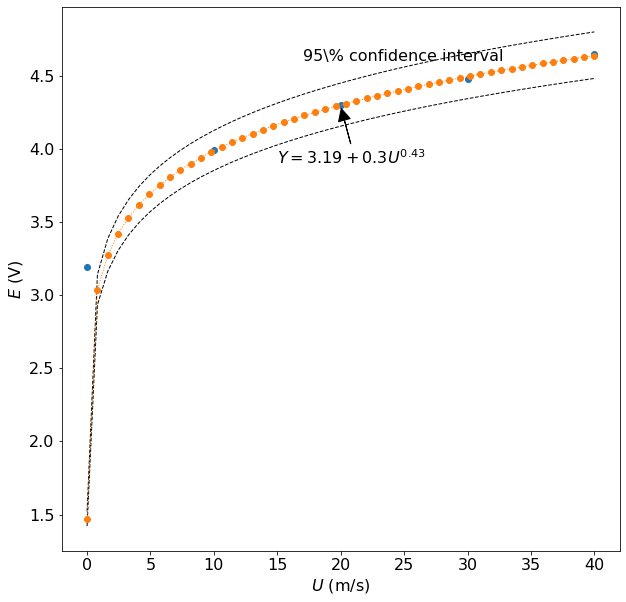

In [35]:
# 6 and 7
"""Getting weird data"""
# since E(U = 0) = 3.19 V, we get a = 3.19 V
#a_ = 3.19 # V ????

plt.figure(figsize=(10,10))
plt.plot(U,E,'o')

# for smooth plot
u = np.linspace(0.001,40)

x = np.log10(u)
y = A * x + B
yu = y + 0.015 # linear confidence interval 
yl = y - 0.015

Es = 10**(y) + a
Eu = 10**(yu) + a # confidence interval non-linear
El = 10**(yl) + a

plt.plot(u,El ,'k--')
plt.plot(u,Eu,'k--')
plt.plot(u,Es)
plt.xlabel("$U$ (m/s)", fontsize=16)
plt.ylabel("$E$ (V)",fontsize=16);
plt.text(17,4.6,'95\% confidence interval',fontsize=16)
plt.annotate('$Y = 3.19 + 0.3U^{0.43}$',xy=(20,4.29),xytext=(15,3.9),arrowprops=dict(facecolor='black', shrink=0.05,width=.1),fontsize=16);


## Part II : 

### EXO A : Understand sampling, clipping and aliasing problems


This part is based on your toolbox previously constructed in the part II of computer session I. More specificallty, we will use the function that performs the ad conversion.



In [93]:
from scipy.interpolate import interp1d


t = np.linspace(0,1,1000) # almost continuous
y = 3 + 3*np.sin(2*np.pi*10*t)

def sample(t,y,fs):
    """ sample the continuous signal"""
    dt = 1./fs
    ts = np.arange(t[0],t[-1],dt) 

    ys = np.interp(ts,t,y,left=0.0,right=0.0) # sample and holds the value unitil the next step in the ts array (ADC)
    
    return ts,ys

def quantization(ys,N):
    """quantization of a signal
    inputs:
        ts - time signal [s], array
        ys - signal [Volt], array
        N  - number of bits, scalar (2,4,8,12,...)
    outputs:
        yq - digitized signal at N bits
    """
    #quantization
    # gives a finite discrete value to the samples
        
    max_value = 2**(N-1) - 1 # corresponds to the max number of steps k = 2^N where N is the size of the ADC
    
    yq = (ys*(max_value)).astype(np.int32) / (max_value) # rounds to the step
    
    return yq

def clipping(y,miny=-5,maxy=5):
    """ clipping of signal 
    inputs: 
        y - signal [V] array of floats
        miny, maxy - lowest, highest values [V], scalar floats, default -5 ..+5 [Volt]
    outputs:
        y - clipped signal [V]
    """
    #clipping
    y[y < miny] = miny
    y[y > maxy] = maxy # wth is it doing?

    return y

def sample_hold_reconstruction(t, ts, yq, method=None):
    """ sampling and holding 
    inputs: 
        yq - digitized signal at N bits
        ts - time signal [s], array
        t  - time signal [s], array of floats, dense sampled

    outputs:
        yr - reconstructed signal
    """
    # sample and hold reconstruction
    # whaaaaaaaaaat
    if method == 'soh': 
        tr = t
        soh = interp1d(ts, yq, kind='zero', bounds_error=False,fill_value=yq[-1])
        yr = soh(tr)

    elif method == None:
        tr = ts
        yr = yq
    else:
        raise(ValueError)
    
    return tr, yr

def adc(t,y,fs=1.,N=24,miny=0,maxy=6,method=None):
    """ A/D conversion
    Inputs:
        t - time [s] array of floats,
        y - signal [V] array of floats,
        fs - sampling frequency [Hz], scalar float,
        N - number of bits of the A/D converter, (2,4,8,12,14,...)
        miny, maxy - lowest, highest values [V], scalar floats, default -5 ..+5 [Volt]
        method - the reconstruction method: 'zoh' = zero-and-hold, 'soh' - sample and hold or None
    outputs:
        ts - sampled times [s]
        yq - sampled and digitized signal [V]
        yr - reconstructed, sample-and-hold signal [V]

    """
    # first sample
    ts,ys = sample(t,y,fs)
    
    # clipping
    ys = clipping(ys,miny,maxy)
    
    # digitize
    yq = quantization(ys,N)
    
    # reconstruct
    tr,yr = sample_hold_reconstruction(t, ts, yq, method='soh')
        
    return ts,yq,tr,yr

We will take advantage of the function adc to perform the analoog to digital conversion and analyse what happens for different sampling frequencies.

1. Perform the conversion with a sampling frequency of 15 Hz, 11 , 9, 6 ,  3.
2. Estimate the aliasing for each case using the formula : 

if $f_s > 2 f$ , no aliasing

if $2/3 f < f_s < 2 f$, $f_a = |f_s - f|$

if $f_s < 2/3 f$, $f_a = (f/f_f)f_f$, where $f_f = f_s/2$ 

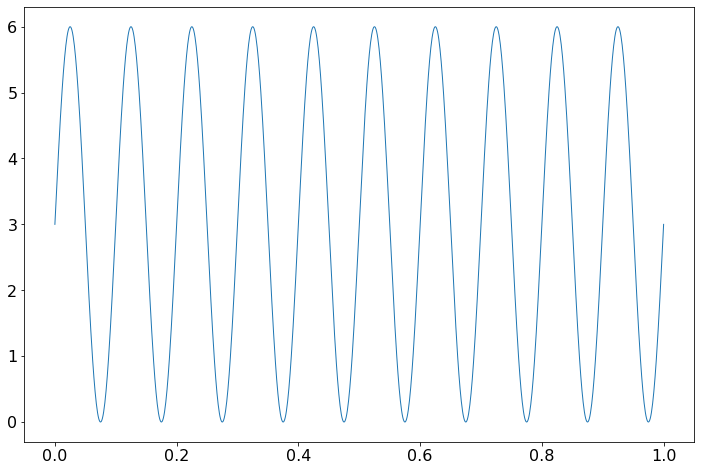

In [91]:
# 0
plt.plot(t,y,"-")


fa : 5


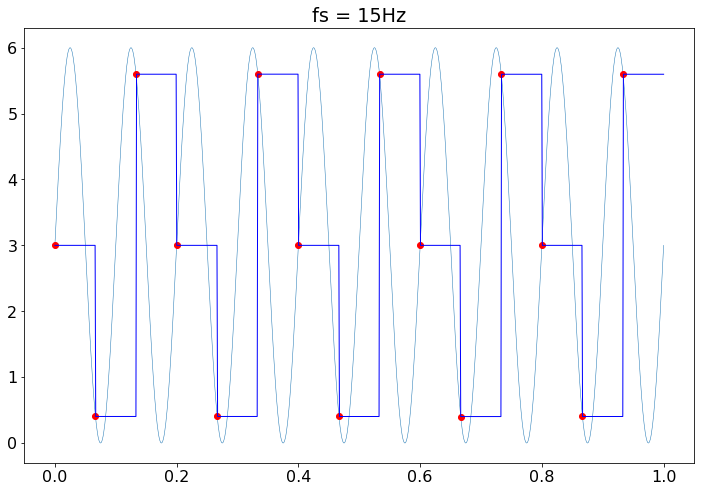

fa : 1


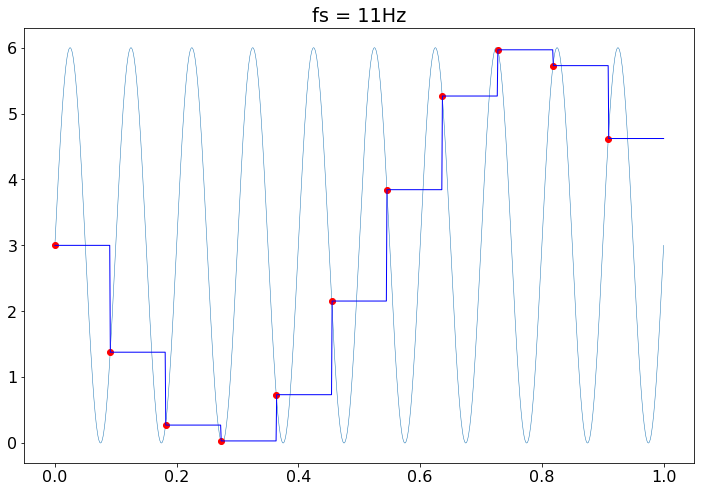

fa : 1


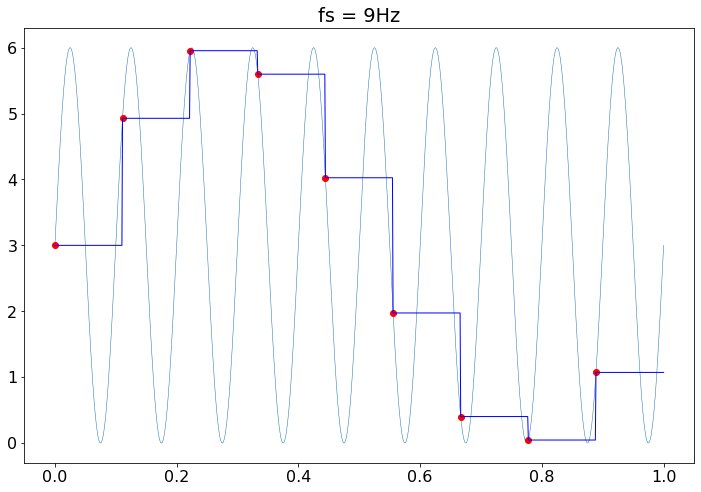

fa : 3.3333333333333335


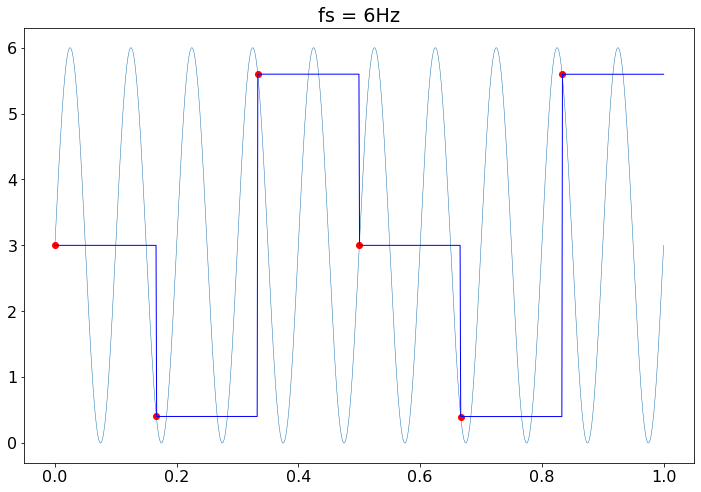

fa : 6.666666666666667


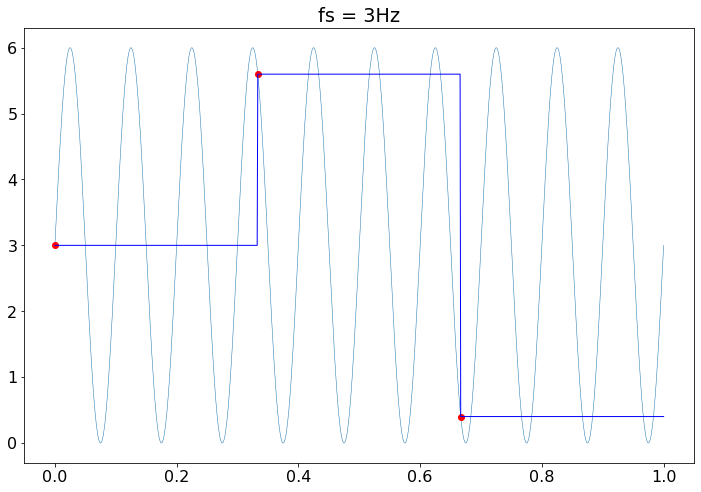

In [122]:
# 1

# 2 aliasing

def aliasing(t,fs):
    steps = len(t)
    # dt = (t[-1] - t[0]) / steps
    # f = 1. / dt
    f = 10
    fa = 0

    if fs > 2 * f :
        fa = 0
    elif fs > (2 / 3) * f and fs <= 2 * f:
        fa = abs(fs - f)
    elif fs < (2 / 3) * f :
        fa =  (2 * f) / fs
    return fa

# fs = 15Hz
ts,yq,tr,yr = adc(t,y,15)
fa = aliasing(t,15)
print("fa :",fa)

plt.plot(t,y,'-',lw=0.5,)
plt.plot(ts,yq,'ro',tr, yr,'b-')
plt.title("fs = 15Hz")
plt.show()

# fs = 11
ts,yq,tr,yr = adc(t,y,11)
fa = aliasing(t,11)
print("fa :",fa)

plt.plot(t,y,'-',lw=0.5,)
plt.plot(ts,yq,'ro',tr, yr,'b-')
plt.title("fs = 11Hz")
plt.show()

# fs = 9
ts,yq,tr,yr = adc(t,y,9)
fa = aliasing(t,9)
print("fa :",fa)

plt.plot(t,y,'-',lw=0.5,)
plt.plot(ts,yq,'ro',tr, yr,'b-')
plt.title("fs = 9Hz")
plt.show()

# fs = 6
ts,yq,tr,yr = adc(t,y,6)
fa = aliasing(t,6)
print("fa :",fa)

plt.plot(t,y,'-',lw=0.5,)
plt.plot(ts,yq,'ro',tr, yr,'b-')
plt.title("fs = 6Hz")
plt.show()

# fs = 3
ts,yq,tr,yr = adc(t,y,3)
fa = aliasing(t,3)
print("fa :",fa)

plt.plot(t,y,'-',lw=0.5,)
plt.plot(ts,yq,'ro',tr, yr,'b-')
plt.title("fs = 3Hz")
plt.show()





3. What can you say about the sampling frequency and the aliazing. How can we minimize it ? 

fa : 0


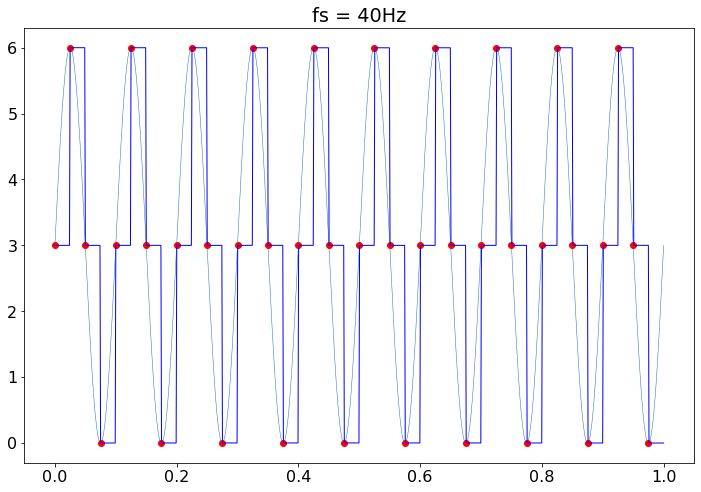

In [126]:
# 3

"""we need to have a sampling frequency of at least 2 times or more the initial frequency.
for example : fs = 40"""

# fs = 40
ts,yq,tr,yr = adc(t,y,40)
fa = aliasing(t,40)
print("fa :",fa)

plt.plot(t,y,'-',lw=0.5,)
plt.plot(ts,yq,'ro',tr, yr,'b-')
plt.title("fs = 40Hz")
plt.show()


### EXO B : Using FFT-based filter to reduce noise / Frequency vs Spectrum Analysis


In [182]:
from numpy import *
from numpy.fft import fft
from matplotlib.pyplot import *
%matplotlib inline

# redefine default figure size and fonts
import matplotlib as mpl
# mpl.rc('text', usetex = True)
mpl.rc('font', family = 'sans serif',size=16)
mpl.rc('figure',figsize=(12,8))
mpl.rc('lines', linewidth=1, color='lightblue',linestyle=':',marker='o')


In [183]:
f_s = 100.0 # sampling frequency (Hz)
T = 3.0 # total actual sample time (s)
g = loadtxt('FFT_Example_data_with_window.txt')
# first few values
g[:5]

array([-1.7527, -0.565 ,  0.8801,  3.1924,  1.2804])

(301,)


/tmp/ipykernel_4836/68521633.py:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  plot(t,g,"-o",markerfacecolor='m',linestyle=':',color='lightgrey')


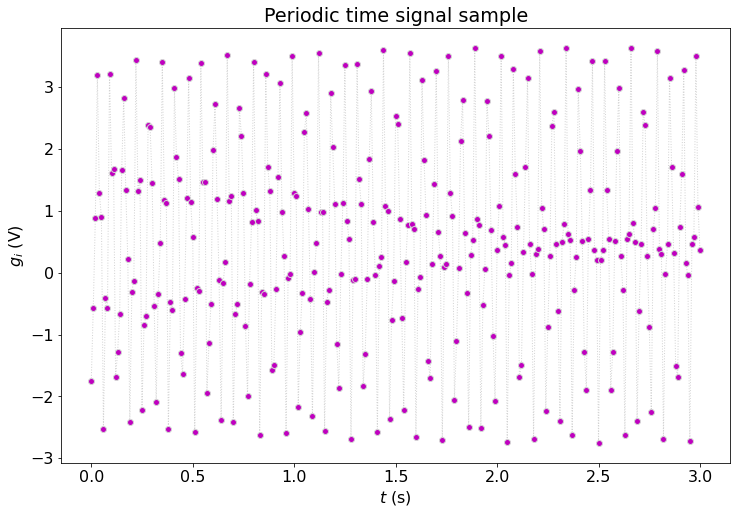

In [184]:
# first, visualize the signal
dt = 1/f_s   # time resolution [s]
t = arange(0.0,T+dt,dt)  # time, t (s)
print(t.shape)
# plotSignal(t,g,f_s)
plot(t,g,"-o",markerfacecolor='m',linestyle=':',color='lightgrey')
xlabel('$t$ (s)')
ylabel('$g_i$ (V)')
title('Periodic time signal sample')
show()

In [185]:
# does it have a non-zero mean, DC value
DC = g.mean()
print ('DC = %f [V]' % DC)

"""the mean is non zero"""

DC = 0.452950 [V]


'the mean is non zero'

### Calculate the necessary parameters: $N, \Delta t, \Delta f, f_{fold},N_{freq}$

In [186]:
N = f_s * T         # number of data points
del_t = 1. /f_s     # time resolution (s)
del_f = 1. / T      # frequency resolution(Hz)
f_fold = f_s / 2    # folding frequency = Nyquist frequency of FFT (Hz)
N_freq = int(N/2.)  # number of useful frequency points

### Frequency analysis using naive FFT

[136.3379    +0.j           0.85689194+0.01756347j
   0.7956033 +0.03999151j   0.83065943+0.02317239j
   0.81648114+0.01029308j   0.86012694-0.03048062j
   0.88366205-0.03279026j   0.91944369-0.03388283j
   0.82537342-0.0616697j    0.78619988+0.03823325j]
(301,)


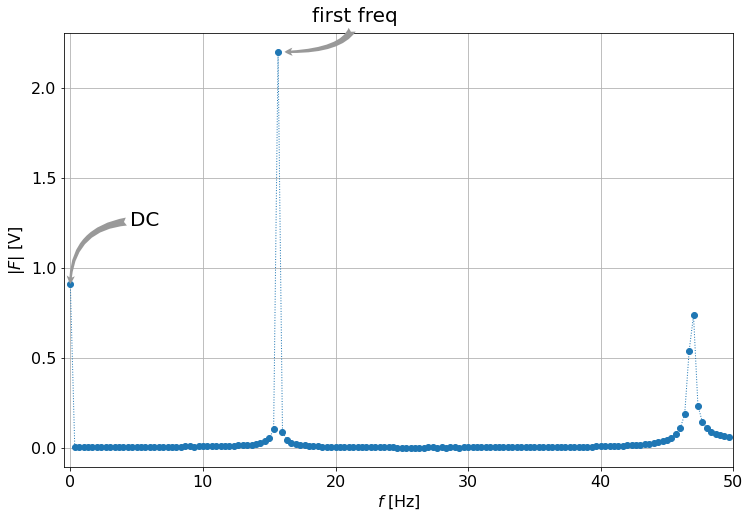

In [187]:
# Perform naive fft using fft function and plot the results
frequency = arange(0,f_fold,del_f)  #frequency (Hz)
G = fft(g) # FFT 

print( G[:10])
print( G.shape)

# Plot the magnitude as a function of the frequency

Magnitude = abs(G)/(N_freq)  # complex -> amplitude:  |F|/(N/2)

figure()
plot(frequency,Magnitude[:N_freq])
grid('on')
xlim([-.5,f_fold])
xlabel('$f$ [Hz]')
ylabel('$|F|$ [V]')

# this pike is because there is an offset in the input signal
annotate('DC', xy=(0,.9), xycoords='data',
        xytext=(60, 60), textcoords='offset points',
        size=20,
        arrowprops=dict(arrowstyle="fancy",
                        fc="0.6", ec="none",
                        connectionstyle="angle3,angleA=0,angleB=90"),
        )

# first isolated frequency thanks to the fourrier transform : f = 16Hz
annotate("first freq",xy=(16,2.2), xycoords='data',
        xytext=(30, 30), textcoords='offset points',
        size=20,
        arrowprops=dict(arrowstyle="fancy",
                        fc="0.6", ec="none",
                        connectionstyle="angle3,angleA=90,angleB=0"))
show()

1. Note the value at 0 Hz, what can we learn from it ? it's about 0.45 Volt
2. What do we learn from about the frequencies? about 2.1V at 16 Hz and 0.7 Volt at 47 Hz? 


0.44999999999999785
[1.35000000e+02+0.j         4.24289610e-04-0.04051519j
 1.69933756e-03-0.08112553j 3.83170945e-03-0.12192697j
 6.83244274e-03-0.16301715j 1.07171914e-02-0.20449619j
 1.55064331e-02-0.2464677j  2.12257453e-02-0.28903965j
 2.79061547e-02-0.33232553j 3.55845728e-02-0.37644546j]
(300,)


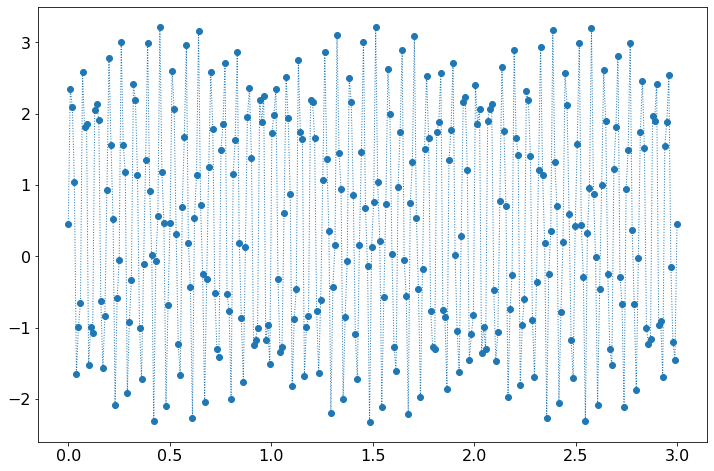

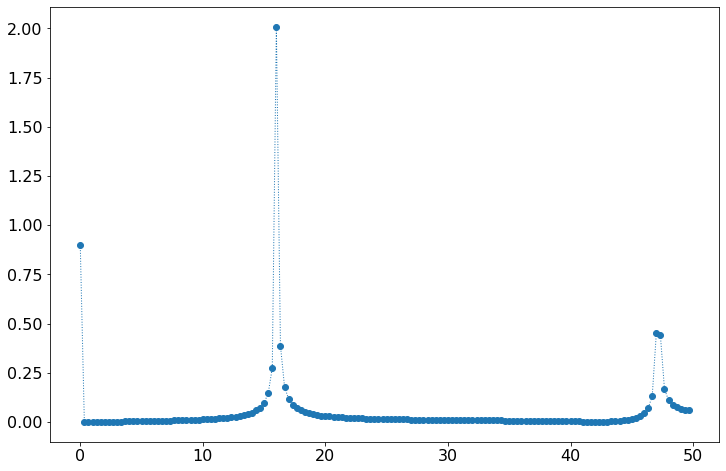

In [188]:
# 1
"""This is the offset of the input signal, meaning the amplitude of the sine wave is 0.45V when the angle in sin(2 pi f * t) = 0°"""

# 2
"""
The input signal is composed of 2 pure sine waves, one at 16Hz and the other at 47Hz
Fourrier helped us isolate those frequencies
"""

# 2. 1 proof
T1 = 3
f_s1 = 100.0 # sampling frequency (Hz)

t1 = np.linspace(0,T,300) # almost continuous

y1 = 0.45 + 2.1 * np.sin(2 * np.pi * 16 * t1) + 0.7 * np.sin(2 * np.pi * 47 * t1) 
DC = y.mean()
print(DC)
plot(t1,y1)

# FFT

N1 = f_s1 * T1         # number of data points
del_t1 = 1. /f_s1     # time resolution (s)
del_f1 = 1. / T1      # frequency resolution(Hz)
f_fold1 = f_s1 / 2    # folding frequency = Nyquist frequency of FFT (Hz)
N_freq1 = int(N1/2.)  # number of useful frequency points

frequency1 = arange(0,f_fold1,del_f1)  #frequency (Hz)
G1 = fft(y1) # FFT 

print( G1[:10])
print( G1.shape)

# Plot the magnitude as a function of the frequency

Magnitude1 = abs(G1)/(N_freq1)  # complex -> amplitude:  |F|/(N/2)

figure()
plot(frequency1,Magnitude1[:N_freq1])


3. Let's remove DC and repeat the frequency analysis.

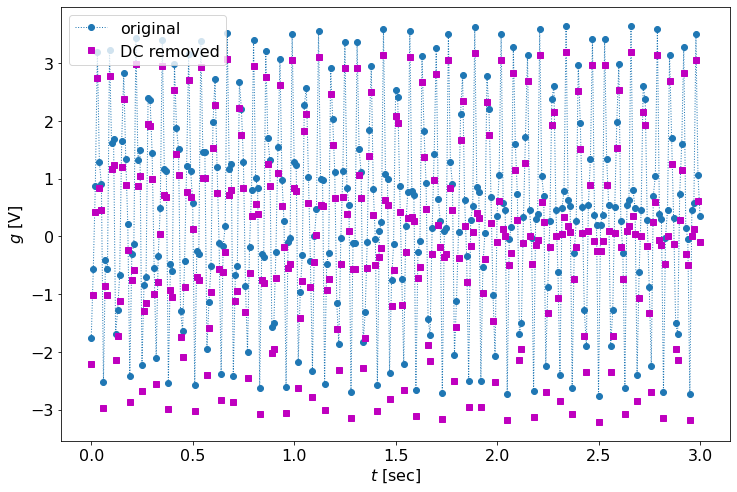

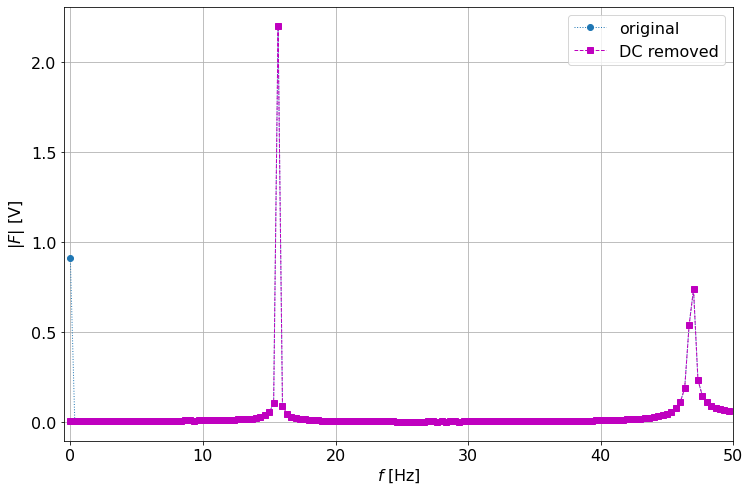

In [190]:
# 3
figure()
plot(t,g,t,g-DC,'ms')
xlabel('$t$ [sec]')
ylabel('$g$ [V]')
legend(('original','DC removed'))

# repeat the frequency analysis
G = fft(g-DC) # FFT of the signal without DC
Magnitude1 = abs(G)/(N_freq)  # complex -> amplitude:  |F|/(N/2)

figure()
plot(frequency,Magnitude[:N_freq], frequency,Magnitude1[:N_freq],'--ms')

grid('on')
xlim([-.5,f_fold])
xlabel('$f$ [Hz]')
ylabel('$|F|$ [V]')
legend(('original','DC removed'))
show()

4. use 2^k number of points for faster FFT
5. multiply the signal by a low-pass filter:
    * assure there is no aliasing
    * get read of the edges and make it less leaking


In [191]:
# 4.1
# let's check how much we gain if we do it right size:
%timeit fft(g)  
%timeit fft(g[:256])   # 256 points instead of 301, not wasting much data


# even if it's longer, but the right size with zeros at the end
g1 = zeros((512,))
g1[:301] = g.copy()
%timeit fft(g1) 

14.1 µs ± 950 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
10.3 µs ± 2.04 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
13.3 µs ± 1.38 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [194]:
# 4.2 : shorten to 2^k

N_2 = 2**np.fix(log2(N)).astype(int)        # shorten to 2^k
T_2 = N_2/f_s                               #  total useful sample time (s)
del_f_2 = 1/T_2                             # (Hz)
N_freq_2 = N_2/2                            # number of useful discrete frequencies
t_2 = arange(0.0,T_2+del_t,del_t)           #time, t (s)
frequency_2 = arange(0,f_fold,del_f_2)      #frequency (Hz)
len2, = t_2.shape

# remove DC first
g_uncoupled_2 = g - DC

print(del_f_2)

0.390625


6. Create a low pass filter using Hanning.


In [205]:
# 6 create the low pass filter, called Hanning

u_Hann_2 = 0.5*(1-cos(2*pi*t_2[:-1]/T_2))   #u_Hanning(t)
DC_2 = mean(g[:len2-1])                     #DC = mean value of input signal (V) (average of all the useful data)



7. Remove DC and perform the fft on the the filtered, shorter signal,
8. Plot the magnitude as a function of the frequency again.


0.454001171875


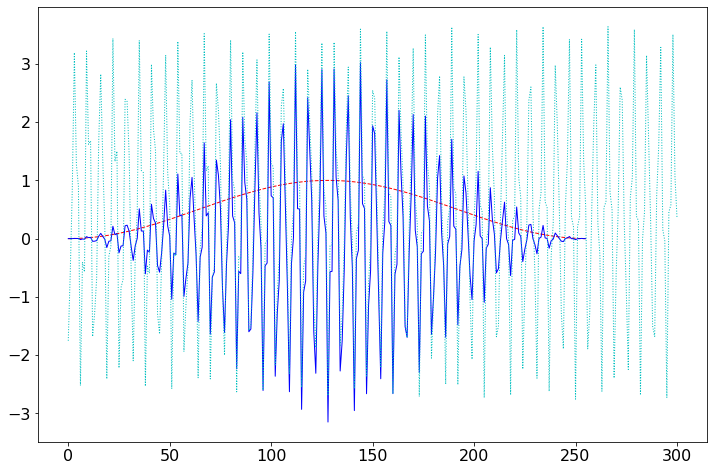

In [209]:
# 7 remove the DC
g_uncoupled_2 = g[:len2-1]-DC_2             # uncoupled

g_Hann_2 = g_uncoupled_2 * u_Hann_2

print(DC_2)
# print(g_Hann_2[:30])


figure()
plot(u_Hann_2,'r--')
plot(g_Hann_2,'b-')
plot(g,'c:')

# 7 take the FFT of the filtered, shorter signal
G_Hann_2 = fft(g_Hann_2,N_2)  #G(omega) with Hanning window



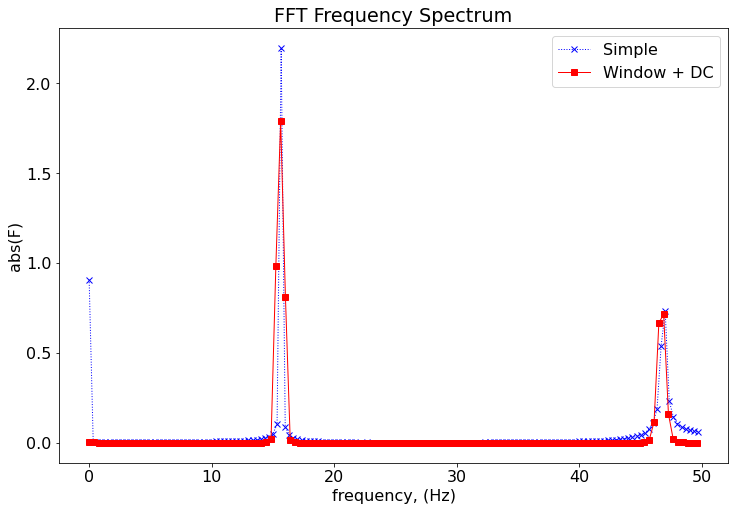

In [210]:
# 8
Magnitude_Hann_2 = abs(G_Hann_2)*sqrt(8./3.)/(N_2/2)  #|F|*sqrt(8/3)/(N/2)

figure()
plot(frequency,Magnitude[:frequency.shape[0]],'b:x')
plot(frequency_2,Magnitude_Hann_2[:frequency_2.shape[0]], 'r-s')
xlabel('frequency, (Hz)')
ylabel('abs(F)')
title('FFT Frequency Spectrum')
legend(('Simple','Window + DC'))

9. What can you say about the resolution ? 


In [211]:
# 9
"""the frequency resolution is worse, but the result is better"""
del_f, del_f_2

(0.3333333333333333, 0.390625)

10. Get even more point by adding zeros and recover the signal. what can you say about the resolution now ?

512


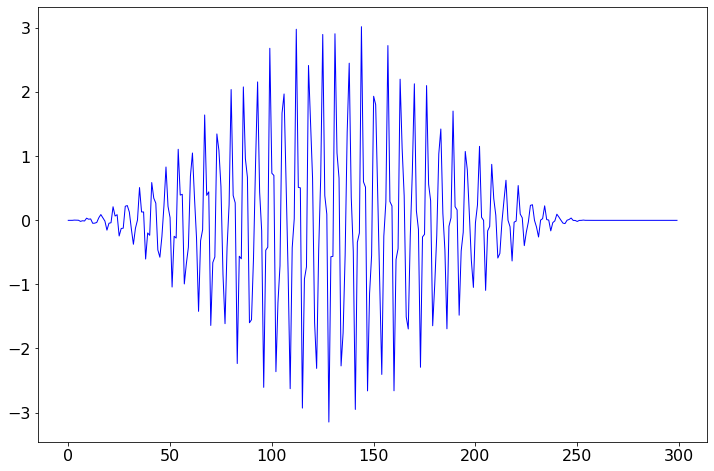

In [227]:
# let's do it better if we get more points, better resolution
# we can recover the same resolution as before by adding zeros
# or improve somewhat by taking longer to the next 2^k vector

N_3 = 2**ceil(log2(N)).astype(int)        # shorten to 2^k
T_3 = N_3/f_s                             #  total useful sample time (s)
del_f_3 = 1/T_3                           # (Hz)
N_freq_3 = int(N_3/2)                         # number of useful discrete frequencies
t_3 = arange(0.0,T_3+del_t,del_t)  #time, t (s)
frequency_3 = arange(0,f_fold,del_f_3)  #frequency (Hz)
len3, = t_3.shape

# prepare the same signal
g_uncoupled_2 = g - DC
u_Hann_2 = 0.5*(1-cos(2*pi*t_2[:-1]/T_2))  #u_Hanning(t)
DC_2 = mean(g[:int(len2-1)])  #DC = mean value of input signal (V) (average of all the useful data)
g_uncoupled_2 = g[:int(len2-1)]-DC_2  # uncoupled
g_Hann_2 = g_uncoupled_2 * u_Hann_2


# pad with zeros
g_Hann_3 = zeros((N_3,))
g_Hann_3[:g_Hann_2.shape[0]] = g_Hann_2.copy() 

figure()
plot(g_Hann_3[:300],'b-') # points up to 500

# take the FFT of the filtered, shorter signal
G_Hann_3 = fft(g_Hann_3,N_3)  #G(omega) with Hanning window

Magnitude_Hann_3 = abs(G_Hann_3)*sqrt(8./3.)/(N_2/2)  #|F|*sqrt(8/3)/(N/2)
# Magnitude_Hann_2[0] = Magnitude_Hann_2[0]/2 + DC_2  #(also divide the first one by 2, and add back the DC value)

len_loc, = Magnitude_Hann_3.shape
A_3 = Magnitude_Hann_3[0:int(len_loc/2)]
Freq_3 = frequency_3[0:int(len_loc/2)]

print(N_3)

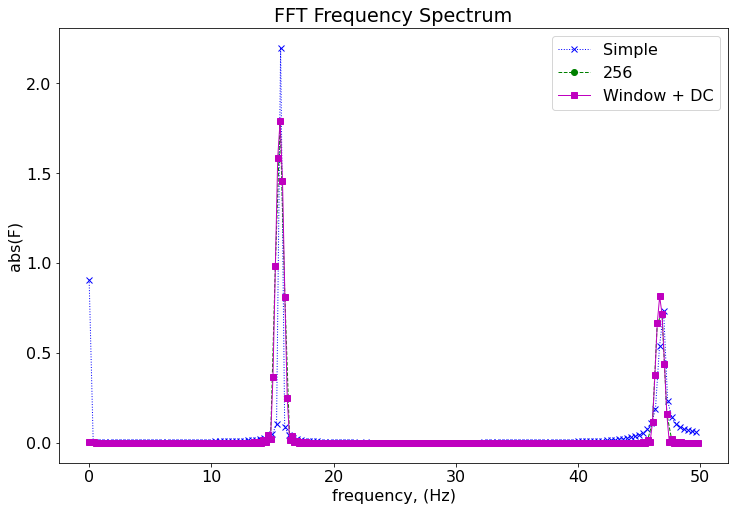

In [222]:
figure()
plot(frequency,Magnitude[:frequency.shape[0]],'b:x')
plot(frequency_2,Magnitude_Hann_2[:frequency_2.shape[0]], 'g--o')
plot(frequency_3,Magnitude_Hann_3[:frequency_3.shape[0]], 'm-s')

xlabel('frequency, (Hz)')
ylabel('abs(F)')
title('FFT Frequency Spectrum')
legend(('Simple','256', 'Window + DC'))

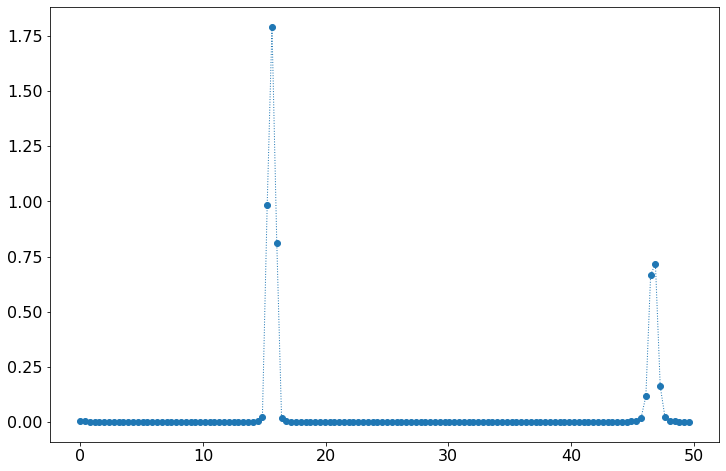

In [223]:
f = frequency_2
a = Magnitude_Hann_2[:f.shape[0]]
plot(f,a)

1.7914015486916908 15.625
0.7161739235195177 46.875


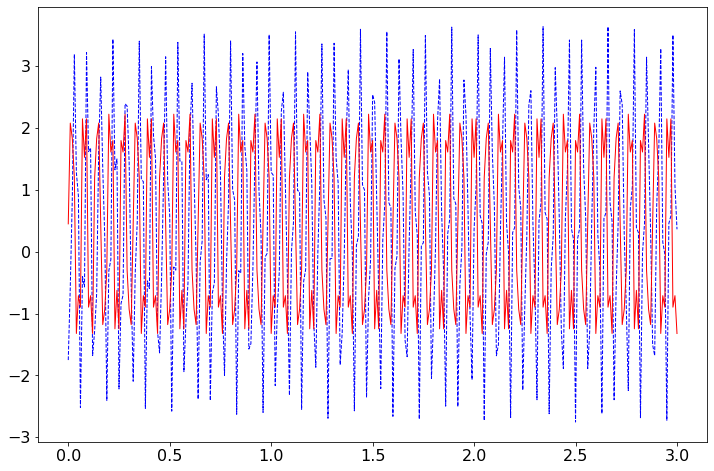

In [226]:
a1,f1 = a.max(),f[a.argmax()]
print (a1,f1)


b = a.copy()
b[:a.argmax()+10] = 0 # remove the first peak
a2,f2 = b.max(),f[b.argmax()]
print( a2,f2)


# our model now is the time reconstructed signal
t = arange(0.0,T+del_t,del_t)  # time, t (s)
g1 = DC + a1*sin(2*pi*f1*t) + a2*sin(2*pi*f2*t)
plot(t,g,'b--',t,g1,'r-')

##### Lecturers

Tahani Madmad : mdm@ecam.be

<span>

Nicolas Marchand : mch@ecam.be

##### References